# 主成分分析についてまとめる

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
iris = sns.load_dataset('iris')
iris.head(n = 5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


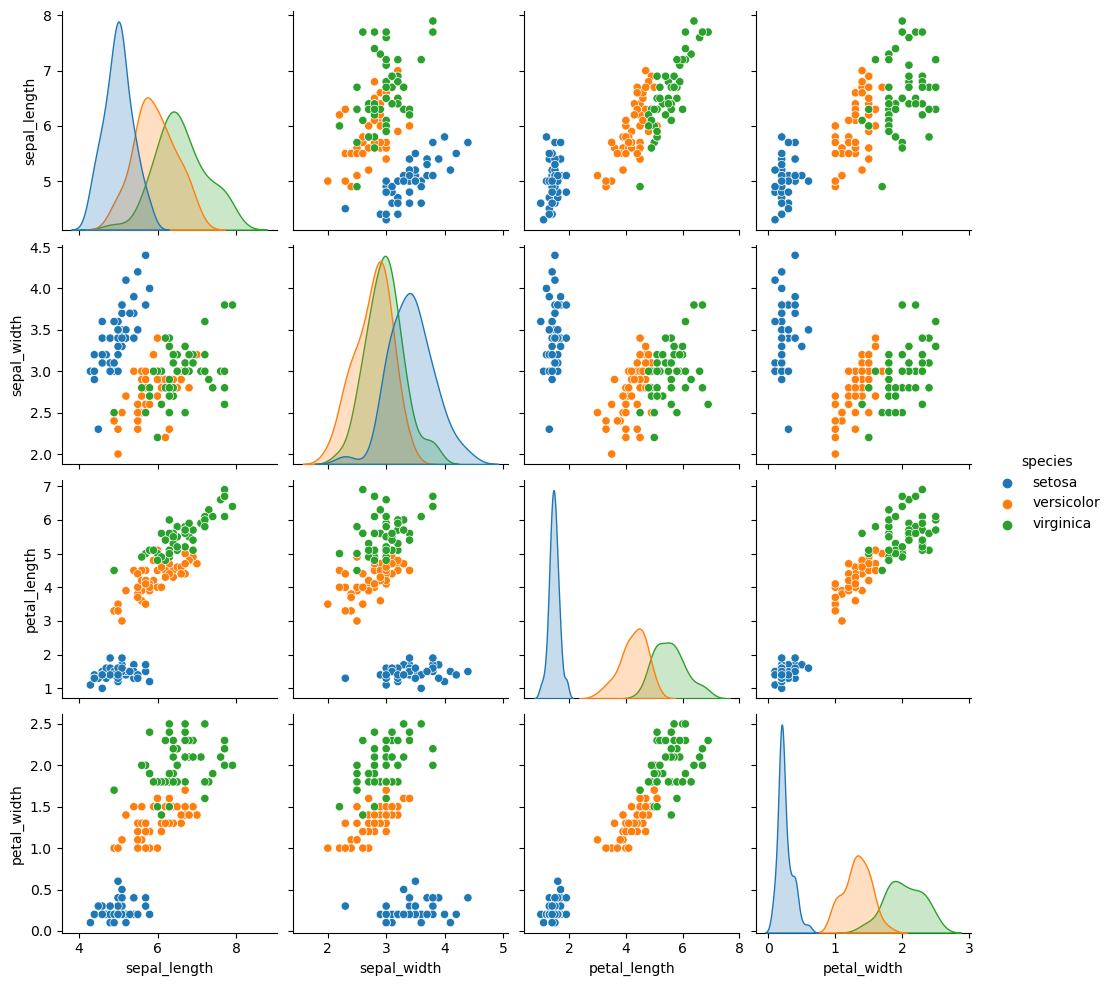

In [4]:
sns.pairplot(iris, hue="species")
plt.show()

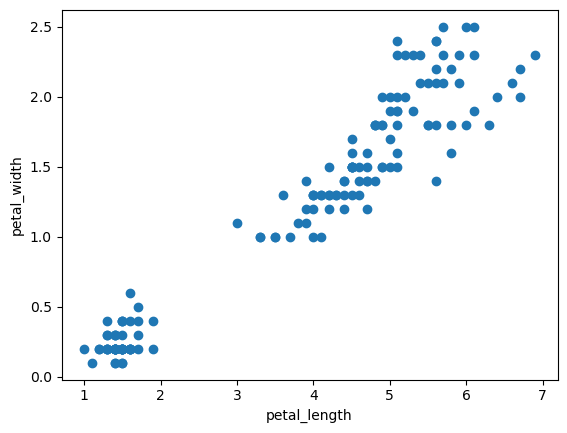

In [5]:
plt.scatter(
    x = iris.petal_length,
    y = iris.petal_width,
    label = " test plot"
)
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.show()

In [6]:

iris["petal_length"], iris["petal_width"]

(0      1.4
 1      1.4
 2      1.3
 3      1.5
 4      1.4
       ... 
 145    5.2
 146    5.0
 147    5.2
 148    5.4
 149    5.1
 Name: petal_length, Length: 150, dtype: float64,
 0      0.2
 1      0.2
 2      0.2
 3      0.2
 4      0.2
       ... 
 145    2.3
 146    1.9
 147    2.0
 148    2.3
 149    1.8
 Name: petal_width, Length: 150, dtype: float64)

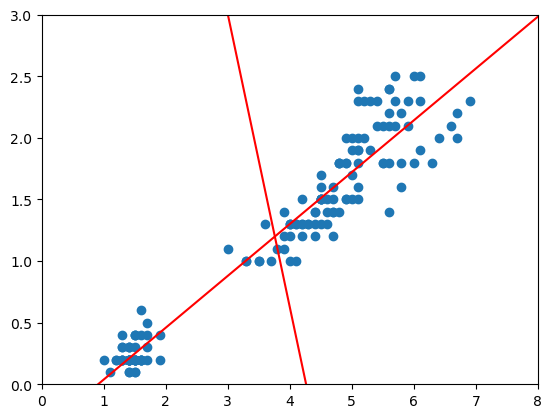

In [7]:
# 主成分分析
from sklearn.decomposition import PCA
PCA = PCA()
PCA.fit(iris[["petal_length", "petal_width"]])
pc = PCA.transform(iris[["petal_length", "petal_width"]])

plt.scatter(
    x = iris["petal_length"],
    y = iris["petal_width"]
)

line_tr1 = PCA.inverse_transform(np.c_[np.arange(300) - 150, np.zeros(300)])
line_tr2 = PCA.inverse_transform(np.c_[np.zeros(70), np.arange(70) - 30])

plt.plot(line_tr1[:, 0], line_tr1[:,1], color="red")
plt.plot(line_tr2[:, 0], line_tr2[:,1], color="red")

plt.xlim(0, 8)
plt.ylim(0, 3)
plt.show()

In [8]:
iris[["petal_length", "petal_width"]].describe()

,petal_length,petal_width
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [9]:
# p170
iris_length_width = iris[["petal_length", "petal_width"]]
a0 = np.array([[1, -1]])

# ノルムの大きさ１にする
a =  a0 / np.linalg.norm(a0)
a@(iris_length_width.T)

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.848528,0.848528,0.777817,0.919239,0.848528,0.919239,0.777817,0.919239,0.848528,0.989949,...,2.262742,1.979899,2.262742,2.545584,2.262742,2.05061,2.192031,2.262742,2.192031,2.333452


# リンク関数？　z = a1x1 + a2x2　を計算する

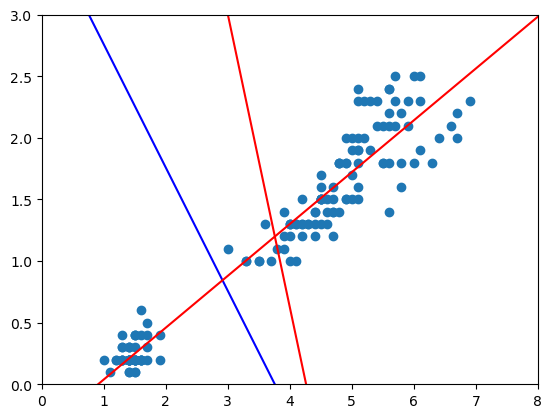

In [10]:
# 主成分分析
# 上のコードとほぼ同じ
from sklearn.decomposition import PCA
PCA = PCA()
PCA.fit(iris[["petal_length", "petal_width"]])
pc = PCA.transform(iris[["petal_length", "petal_width"]])

plt.scatter(
    x = iris["petal_length"],
    y = iris["petal_width"]
)

# line_tr1 = PCA.inverse_transform(np.c_[np.arange(300) - 150, np.zeros(300)])
# line_tr2 = PCA.inverse_transform(np.c_[np.zeros(70), np.arange(70) - 30])

# a0を色々変えてみる
a0 = np.array([1, -1])
a  = a0 / np.linalg.norm(a0)

# z = a1 + a2
pts = np.linspace(-150, 250, 400)
plt.plot(pts,(a[0]/a[1])*pts+np.mean(iris["petal_length"]),color="blue")

plt.plot(line_tr1[:, 0], line_tr1[:,1], color="red")
plt.plot(line_tr2[:, 0], line_tr2[:,1], color="red")

plt.xlim(0, 8)
plt.ylim(0, 3)
plt.show()

# 乳がんのデータセットを主成分分析する
- 乳がんのデータは30カラムあり、それぞれを標準化
- 寄与率出す

In [11]:
from sklearn.datasets import load_breast_cancer
bc = bc = load_breast_cancer()
df = pd.DataFrame(data=bc.data, columns=bc.feature_names)

In [18]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# numpy にへんかん
X = df.values
print((f"カラムの名前{bc.feature_names}"))
print(f"カラムの数{len(bc.feature_names)}")

カラムの名前['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
カラムの数30


In [21]:
# 標準化
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

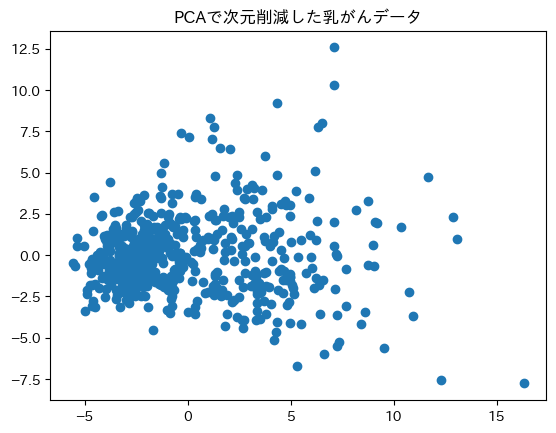

In [25]:
from sklearn.decomposition import PCA
import japanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

PCA = PCA()

PCA.fit(X_scaled)

x_pca = PCA.transform(X_scaled)

plt.scatter(x_pca[:,0], x_pca[:,1])

plt.title("PCAで次元削減した乳がんデータ")
plt.show()

# 寄与率出す。

In [28]:
#カラムの数は30あり、固有値も同数ある
len(x_pca[0])

30

In [40]:
# 寄与率
df_kiyoritsu = pd.DataFrame(data = PCA.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(df.columns))])
df_kiyoritsu["column_name"] = df.columns
df_kiyoritsu = df_kiyoritsu.rename(columns={0: "固有値"})
df_kiyoritsu.sort_values('固有値')
df_kiyoritsu

,固有値,column_name
PC1,13.304991,mean radius
PC2,5.701375,mean texture
PC3,2.822910,mean perimeter
PC4,1.984128,mean area
PC5,1.651633,mean smoothness
PC6,1.209482,mean compactness
PC7,0.676409,mean concavity
PC8,0.477456,mean concave points
PC9,0.417629,mean symmetry
PC10,0.351311,mean fractal dimension


In [42]:
# 累積寄与率出す
# 寄与率
df_kiyoritsu["累積累積固有値"] = df_kiyoritsu["固有値"].cumsum()
df_kiyoritsu["累積寄与率"]    = df_kiyoritsu["累積累積固有値"] / df_kiyoritsu["固有値"].sum()
df_kiyoritsu

,固有値,column_name,累積寄与率,累積累積固有値
PC1,13.304991,mean radius,0.442720,13.304991
PC2,5.701375,mean texture,0.632432,19.006365
PC3,2.822910,mean perimeter,0.726364,21.829276
PC4,1.984128,mean area,0.792385,23.813403
PC5,1.651633,mean smoothness,0.847343,25.465036
PC6,1.209482,mean compactness,0.887588,26.674519
PC7,0.676409,mean concavity,0.910095,27.350927
PC8,0.477456,mean concave points,0.925983,27.828384
PC9,0.417629,mean symmetry,0.939879,28.246012
PC10,0.351311,mean fractal dimension,0.951569,28.597323


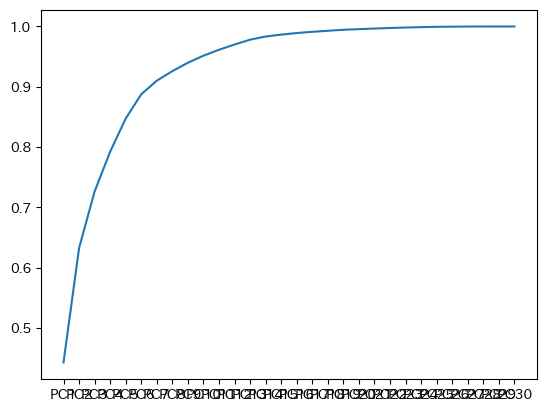

In [43]:
plt.plot(df_kiyoritsu["累積寄与率"])

# ３次元の乳がんデータセットを

In [45]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

index_malignant = np.where(bc.target == 0)
index_benign = np.where(bc.target == 1)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(x_pca[index_malignant, 0], x_pca[index_malignant, 1],x_pca[index_malignant,2], label = "malignant", c = "teal")
ax.scatter(x_pca[index_benign, 0], x_pca[index_benign, 1], x_pca[index_benign, 2], label = "benign", c = "darkorange")
# Figureをリセット
fig.clf()

# Figureを再表示
display(fig)
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

# digits

In [47]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data

In [48]:
labels = digits.target

In [49]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

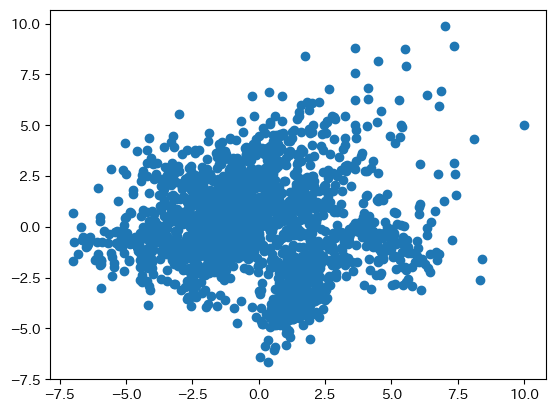

In [54]:
from sklearn.decomposition import PCA

PCA = PCA()
PCA.fit(X_scaled)
x_pca = PCA.transform(X_scaled)
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.show()

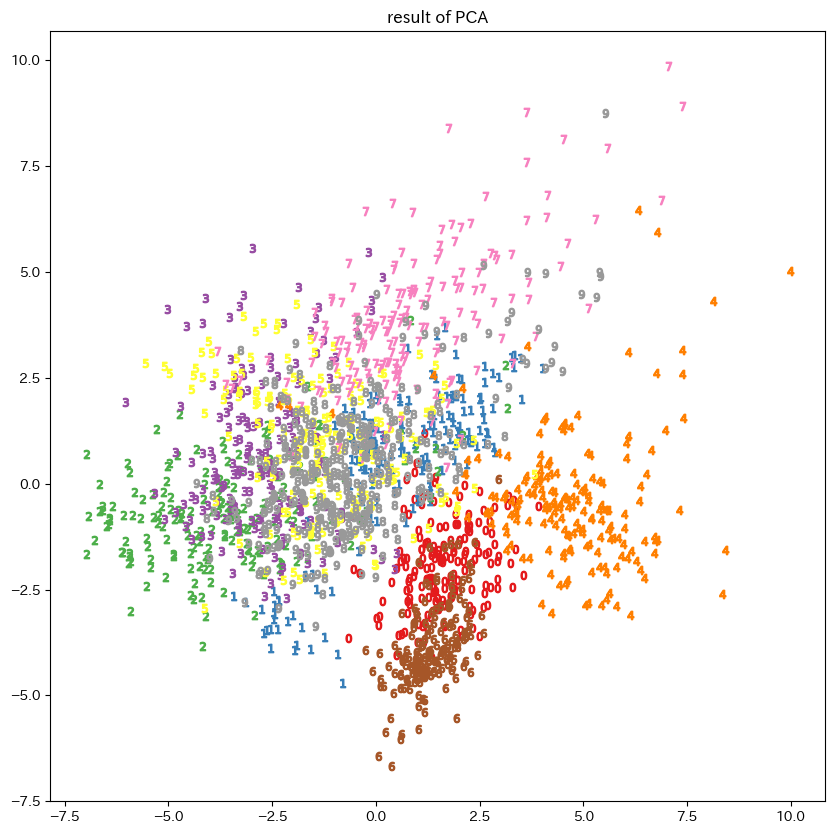

In [55]:
cmp = plt.get_cmap("Set1")
plt.figure(figsize = (10, 10))
for i in range(10):
    flag = labels == i
    X_pca_selected = x_pca[flag, :]
    plt.scatter(X_pca_selected[:,0], X_pca_selected[:,1], color = cmp(i), marker = f"${i}$"
    )
plt.title("result of PCA")
plt.show()